In [72]:
!wget https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py


--2017-12-12 16:53:14--  https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7747 (7.6K) [text/plain]
Saving to: ‘choroplethNYC.py’

choroplethNYC.py    100%[===================>]   7.57K  --.-KB/s    in 0.001s  

2017-12-12 16:53:15 (11.0 MB/s) - ‘choroplethNYC.py’ saved [7747/7747]



In [ ]:
'''using PUMA because each PUMA has a unique value unlike census tract'''

In [105]:
import os
import geopandas as gpd
import choroplethNYC as cp
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib as plt
import statsmodels.formula.api as smf
from pandas import DataFrame
import pylab as pl
import urllib
import io
import requests
import json
import shapely
import zipfile
import urllib
import rtree
%pylab inline
import statsmodels.api as sm
from pygeocoder import Geocoder
import pysal
import clusterpy



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
!wget 'https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile'

--2017-12-14 11:54:41--  https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cwiz-gcty?method=export&format=Shapefile’

cwiz-gcty?method=ex     [ <=>                ] 962.50K  5.52MB/s    in 0.2s    

2017-12-14 11:54:41 (5.52 MB/s) - ‘cwiz-gcty?method=export&format=Shapefile’ saved [985598]



In [23]:
os.getenv("PUIDATA")

'/Users/mariumsultan/Desktop/PUI2017/PUIDATA'

In [396]:
'''run these lines to keep files in seperate directory'''
#os.system("unzip cwiz-gcty?method=export&format=Shapefile -d " + os.getenv("PUIDATA"))
#puma = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/geo_export_23309e54-ddcd-47c2-a502-822700d83a09.shp")


'run these lines to keep files in seperate directory'

In [29]:
!unzip 'cwiz-gcty?method=export&format=Shapefile'

unzip:  cannot find or open cwiz-gcty?method=export&format=Shapefiley, cwiz-gcty?method=export&format=Shapefiley.zip or cwiz-gcty?method=export&format=Shapefiley.ZIP.

No zipfiles found.


In [106]:
puma = gpd.GeoDataFrame.from_file('geo_export_a7687d83-0ddf-4923-a384-fe86c96b267e.shp')

In [107]:
puma.dtypes

shape_area    float64
shape_leng    float64
puma           object
geometry       object
dtype: object

In [108]:
puma.puma = puma.puma.astype(float)

In [109]:
puma.head()

,shape_area,shape_leng,puma,geometry
0,9.792852e+07,53227.144357,3701.0,POLYGON ((-73.89641133483133 40.90450452082026...
1,1.889860e+08,106050.002507,3702.0,POLYGON ((-73.86477258283533 40.90201244187379...
2,2.670137e+08,304070.209400,3703.0,(POLYGON ((-73.78833349834532 40.8346671297593...
3,1.062129e+08,47970.901277,3704.0,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,1.224950e+08,68630.512052,3705.0,POLYGON ((-73.88753429505171 40.82250933946978...


In [37]:
!wget 'https://data.cityofnewyork.us/api/geospatial/2fpa-bnsx?method=export&format=Shapefile'

--2017-12-14 12:07:00--  https://data.cityofnewyork.us/api/geospatial/2fpa-bnsx?method=export&format=Shapefile
Resolving data.cityofnewyork.us... 52.206.68.26
Connecting to data.cityofnewyork.us|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘2fpa-bnsx?method=export&format=Shapefile’

2fpa-bnsx?method=ex     [             <=>    ]  13.15M  3.13MB/s    in 4.8s    

2017-12-14 12:07:11 (2.72 MB/s) - ‘2fpa-bnsx?method=export&format=Shapefile’ saved [13787488]



In [39]:
'''run these lines to keep files in seperate directory'''
#os.system("unzip 2fpa-bnsx?method=export&format=Shapefile -d " + os.getenv("PUIDATA"))
#fac = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/geo_export_f2c636c8-507e-4d77-8a8f-d149628184a2.shp")

'run these lines to keep files in seperate directory'

In [40]:
!unzip '2fpa-bnsx?method=export&format=Shapefile'

Archive:  2fpa-bnsx?method=export&format=Shapefile
  inflating: geo_export_c6c89232-f640-4cfa-8f39-c23b67c56553.dbf  
  inflating: geo_export_c6c89232-f640-4cfa-8f39-c23b67c56553.shp  
  inflating: geo_export_c6c89232-f640-4cfa-8f39-c23b67c56553.shx  
  inflating: geo_export_c6c89232-f640-4cfa-8f39-c23b67c56553.prj  


In [110]:
fac = gpd.GeoDataFrame.from_file('geo_export_c6c89232-f640-4cfa-8f39-c23b67c56553.shp')


In [111]:
fac.head()

,censtract,utilrate,datadate,cartodb_id,zipcode,bbl,uid_merged,nta,commboard,datasource,...,overlevel,opname,factype,optype,facname,address,streetname,idagency,xcoord,geometry
0,87100.0,,FBNYC: 2016-08-27,4779.0,11354.0,4049750001,,QN22,407.0,FBNYC,...,Non-public Oversight,La Jornada,Food Pantry,Non-public,La Jornada,135-32 38 Avenue,38 Avenue,,1.031009e+06,POINT (-73.831214 40.76035)
1,9500.0,,NYSED: 2016-08-27,7666.0,10001.0,1008030007,,MN17,105.0,NYSED,...,NYSED: State,"Vacamas Programs For Youth Of NY, Inc.",Feeding Site,Non-public,Vacamas Programs For Youth,153 West 27 Street,West 27 Street,NYSED: 310200100028,9.861827e+05,POINT (-73.993025 40.746522)
2,91800.0,,FBNYC: 2016-08-27,19304.0,11212.0,3035900050,,BK81,316.0,FBNYC,...,Non-public Oversight,Riverdale Osborne,Food Pantry,Non-public,Riverdale Osborne,440 Watkins Street,Watkins Street,,1.010262e+06,POINT (-73.90624200000001 40.661885)
3,21303.0,,FBNYC: 2016-08-27,35668.0,10027.0,1019670060,,MN06,109.0,FBNYC,...,Non-public Oversight,African Services Committee,Food Pantry,Non-public,African Services Committee,429 West 127 Street,West 127 Street,,9.968606e+05,POINT (-73.954443 40.813433)
4,19400.0,,NYCDHS: 2016-08-27,35721.0,10035.0,1017860018,,MN34,111.0,NYCDHS,...,NYCDHS: City,"Odyssey House, Hdfc",Supportive Housing,Non-public,Haven,239 East 121 Street,East 121 Street,NYCDHS: 88,1.001992e+06,POINT (-73.935917 40.800593)


In [112]:
#https://stackoverflow.com/questions/43401903/python-order-dataframe-alphabetically/43402133

In [118]:
facx = fac.sort_values(by='factype', ascending=False)

In [119]:
facx.factype.unique()

array([u'Zoo/Aquarium', u'Zoo', u'Youth Program',
       u'Workforce1 Sector-Based Career Centers',
       u'Workforce1 Career Center', u'Wholesale Food Market',
       u'Whitehall Ferry Terminal', u'Waterfront Transportation Facility',
       u'Waterfront Property', u'Waterfront Facility',
       u'Water Pollution Control Plant', u'Wastewater Treatment Plant',
       u'Wastewater Pumping Station', u'Waste Tire Storage',
       u'Waste Oil Storage', u'Visual Arts', u'Vehicle Maintenance',
       u'Vehicle Dismantling Facility', u'Used Cooking Oil Processing',
       u'Unspecified Discipline',
       u'United States Court of International Trade Librarian',
       u'United States Court of International Trade', u'Unique Area',
       u'Undeveloped Open Space', u'Undeveloped',
       u'USDA Community Eligibility Option', u'Triangle/Plaza',
       u'Trial-Level Indigent Defense Representation',
       u'Transportation Facility', u'Transit Yard', u'Transit Substation',
       u'Transit Facil

In [120]:
libs = ['Special Libraries', 'Public Libraries', 'Academic Libraries']

In [121]:
#to only get the libraries
facl = facx[facx['factype'].isin(libs)]

In [122]:
facl.columns


Index([ u'censtract',   u'utilrate',   u'datadate', u'cartodb_id',
          u'zipcode',        u'bbl', u'uid_merged',        u'nta',
        u'commboard', u'datasource',   u'capacity',  u'longitude',
         u'dataname',       u'boro',       u'city',      u'idold',
             u'area',  u'facsubgrp',   u'facgroup',  u'facdomain',
              u'bin',    u'dataurl', u'overagency',     u'ycoord',
         u'proptype',    u'council',    u'pgtable',   u'latitude',
         u'borocode',   u'opabbrev', u'overabbrev',   u'areatype',
              u'uid',       u'util', u'addressnum',    u'captype',
        u'overlevel',     u'opname',    u'factype',     u'optype',
          u'facname',    u'address', u'streetname',   u'idagency',
           u'xcoord',   u'geometry'],
      dtype='object')

In [123]:
facl = facl[['cartodb_id', 'zipcode', 'bbl', 'facname', 'factype', 'geometry']]

In [124]:
facl

,cartodb_id,zipcode,bbl,facname,factype,geometry
17424,16790.0,10007.0,1001600021,Historical Records NY Cnty Clerk,Special Libraries,POINT (-74.00155700000001 40.71429)
2531,1437.0,10036.0,1012590048,The General Society Library,Special Libraries,POINT (-73.981346 40.75512)
29525,29303.0,10029.0,1016080069,New York Academy Of Medicine,Special Libraries,POINT (-73.952218 40.791984)
32486,32364.0,10016.0,1008660058,The Morgan Library & Museum,Special Libraries,POINT (-73.981328 40.74929)
14048,13295.0,10010.0,1008230059,Van Alen Institute,Special Libraries,POINT (-73.991829 40.741386)
25914,25579.0,10022.0,1013750031,The Grolier Club Of New York,Special Libraries,POINT (-73.96985599999999 40.763994)
32028,31896.0,10019.0,1010487501,Media Alliance Inc,Special Libraries,POINT (-73.984573 40.767975)
5978,4993.0,10029.0,1016100001,Puerto Rican Cultural Her. Library,Special Libraries,POINT (-73.95136599999999 40.793094)
17257,16631.0,10065.0,1013950064,Old York Library,Special Libraries,POINT (-73.96816699999999 40.763623)
13893,13135.0,10023.0,1011340001,New York Philharmonic,Special Libraries,POINT (-73.983018 40.772818)


In [125]:
facl = facl.reset_index(drop=True)

In [ ]:
##mapping

Text(0.5,1,u'Map of NYC Puma boundries')

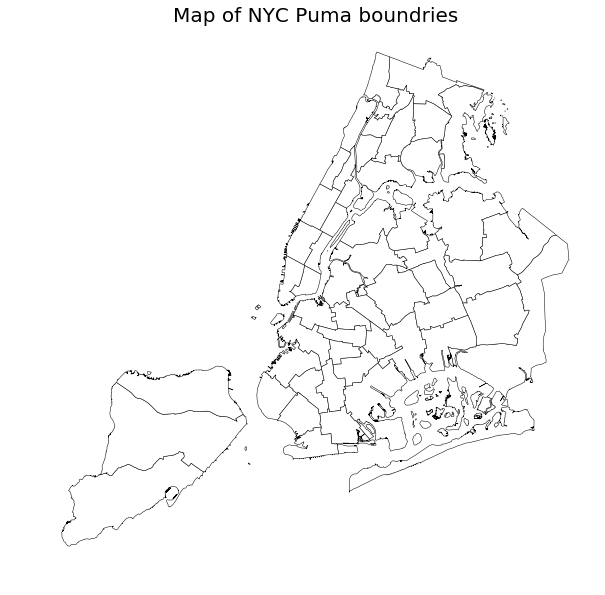

In [53]:
cp.choroplethNYC(puma, column=None, color="white", edgecolor="black", lw=.5);
plt.title("Map of NYC Puma boundries", size=20)



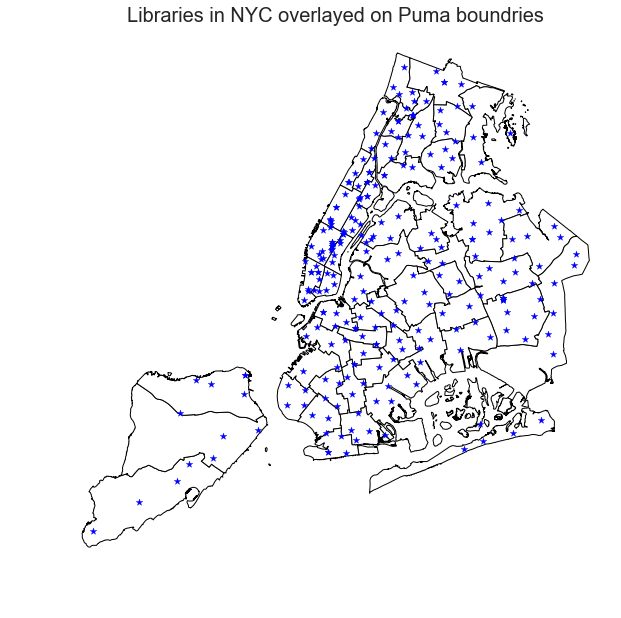

In [126]:
plt.figsize = (30,30)
fig, ax = cp.choroplethNYC(puma, alpha=1, edgecolor='black', color = 'white', lw=1)
facl.plot(ax=ax, c = 'blue', marker = '*')
plt.title("Libraries in NYC overlayed on Puma boundries", size=20)
plt.ylabel("longitude", size=20)
plt.xlabel("latitude", size=20);

In [127]:
#made a file containing my api, example file in repo, rewrite with your API key
from censusAPI import myAPI
myAPI= myAPI()

In [128]:
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [129]:
affkeys = np.array(aff1y['variables'].keys())

In [130]:
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B")  and 'poverty' not in aff1y['variables'][k]['label'] and 'Median household income in the past 12 months (in 2016 inflation-adjusted dollars)' in aff1y['variables'][k]['label']]

[(u'B19013H_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 (u'B19049_003E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Householder 25 to 44 years'),
 (u'B19013I_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 (u'B25119_002E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Owner occupied (dollars)'),
 (u'B19013G_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 (u'B19013D_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 (u'B19013B_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 (u'B25119_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)!

(u'B19013_001E',
  u'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),

In [34]:
iK = 'B19013H_001E'

In [131]:
#helped by people on glitter
url = "https://api.census.gov/data/2015/acs5?get=NAME,B19013H_001E&for=public%20use%20microdata%20area:*&in=state:36&key=" + \
myAPI
resp = requests.request('GET', url).content
PIncome = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [132]:
PIncome.head()

,NAME,B19013H_001E,state,public use microdata area,Unnamed: 4
0,"St. Lawrence County PUMA, New York",44819,36,100,NaN
1,"Clinton, Franklin, Essex & Hamilton Counties P...",50430,36,200,NaN
2,"Warren & Washington Counties PUMA, New York",54376,36,300,NaN
3,Herkimer (North & Central) & Oneida (Outer) Co...,50846,36,401,NaN
4,Oneida County (Central)--Greater Utica & Rome ...,49209,36,402,NaN


In [134]:
puma.dtypes

shape_area    float64
shape_leng    float64
puma          float64
geometry       object
dtype: object

In [135]:
puma['puma'] = puma['puma'].astype(int)

In [136]:
PIncome.dtypes

NAME                          object
B19013H_001E                   int64
state                          int64
public use microdata area      int64
Unnamed: 4                   float64
dtype: object

In [137]:
facl.head()

,cartodb_id,zipcode,bbl,facname,factype,geometry
0,16790.0,10007.0,1001600021,Historical Records NY Cnty Clerk,Special Libraries,POINT (-74.00155700000001 40.71429)
1,1437.0,10036.0,1012590048,The General Society Library,Special Libraries,POINT (-73.981346 40.75512)
2,29303.0,10029.0,1016080069,New York Academy Of Medicine,Special Libraries,POINT (-73.952218 40.791984)
3,32364.0,10016.0,1008660058,The Morgan Library & Museum,Special Libraries,POINT (-73.981328 40.74929)
4,13295.0,10010.0,1008230059,Van Alen Institute,Special Libraries,POINT (-73.991829 40.741386)


In [138]:
PIncome = PIncome.rename(columns={'B19013H_001E': 'MedianIncomeLastYear'})
PIncome = PIncome.rename(columns={'public use microdata area': 'puma'})

In [139]:
PIncomeMap = pd.merge(PIncome, puma, on = 'puma')

In [140]:
PIncomeMap.head()

,NAME,MedianIncomeLastYear,state,puma,Unnamed: 4,shape_area,shape_leng,geometry
0,"NYC-Bronx Community District 8--Riverdale, Fie...",76850,36,3701,NaN,9.792852e+07,53227.144357,POLYGON ((-73.89641133483133 40.90450452082026...
1,"NYC-Bronx Community District 12--Wakefield, Wi...",56434,36,3702,NaN,1.889860e+08,106050.002507,POLYGON ((-73.86477258283533 40.90201244187379...
2,"NYC-Bronx Community District 10--Co-op City, P...",60903,36,3703,NaN,2.670137e+08,304070.209400,(POLYGON ((-73.78833349834532 40.8346671297593...
3,NYC-Bronx Community District 11--Pelham Parkwa...,52431,36,3704,NaN,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",26641,36,3705,NaN,1.224950e+08,68630.512052,POLYGON ((-73.88753429505171 40.82250933946978...


In [142]:
PIncomeMap = gpd.GeoDataFrame(PIncomeMap)

In [143]:
PIncomeMap.dtypes

NAME                     object
MedianIncomeLastYear      int64
state                     int64
puma                      int64
Unnamed: 4              float64
shape_area              float64
shape_leng              float64
geometry                 object
dtype: object

In [ ]:
facl.dtypes

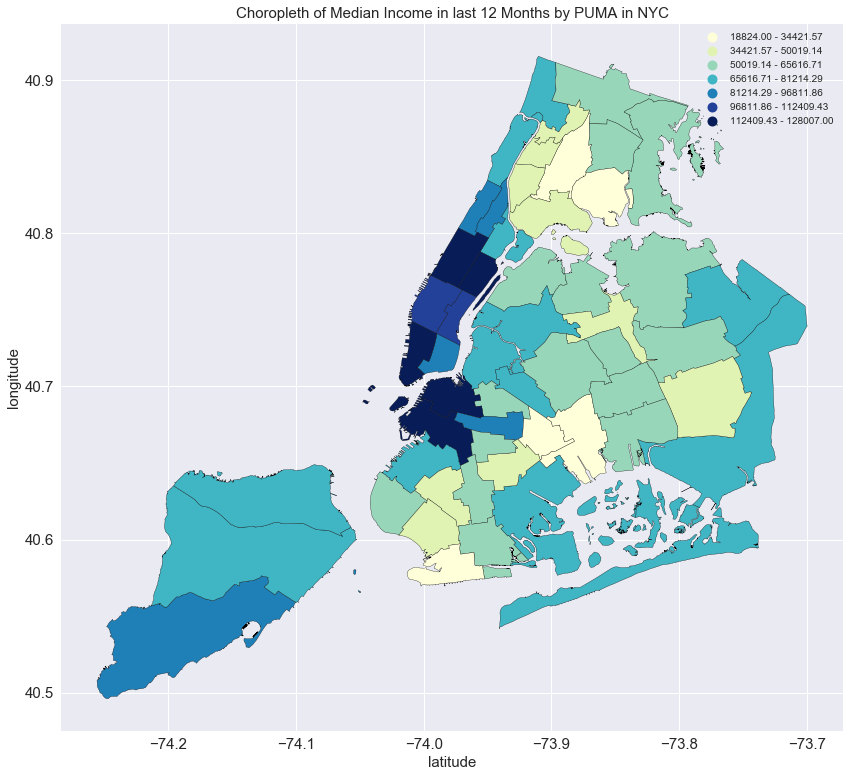

In [308]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(14,13))
base = PIncomeMap.plot(ax=ax, scheme='equal_interval', k=7, column="MedianIncomeLastYear", cmap='YlGnBu', edgecolor="black", legend='true')
ax.legend(loc=2, prop={'size': 30})
ax.set_xlabel('latitude', fontsize=15)
ax.set_ylabel('longitude', fontsize=15)
plt.tick_params(labelsize=15)

ax.set_title("Choropleth of Median Income in last 12 Months by PUMA in NYC", fontsize=15)
fig.savefig('cMapLibIncome')

In [234]:
'''choropleth of income by puma'''


'choropleth of income by puma'

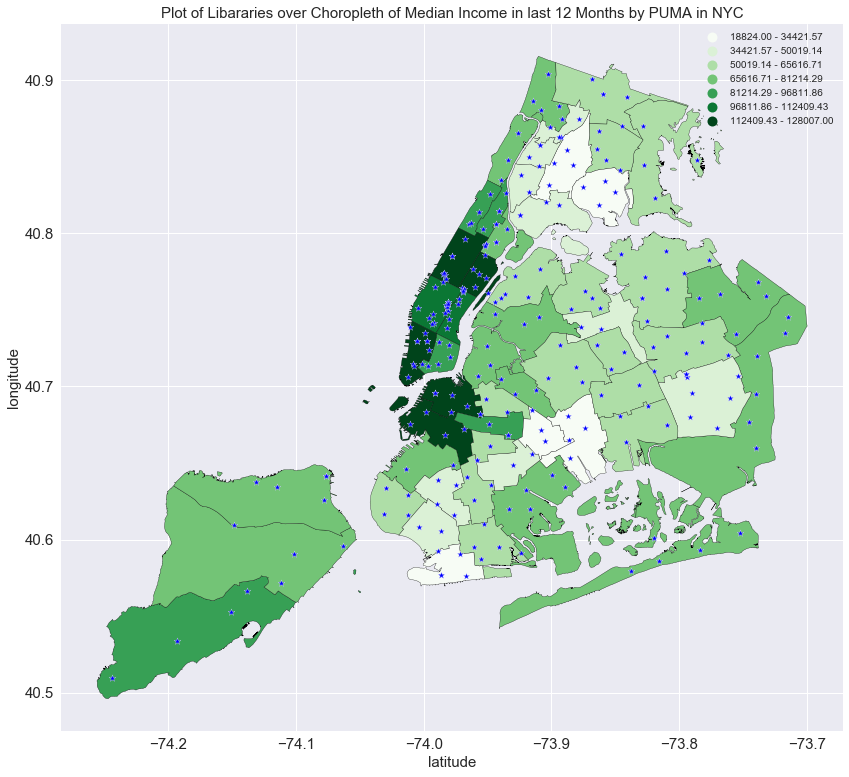

In [307]:

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(14,13))
base = PIncomeMap.plot(ax=ax, scheme='equal_interval', k=7, column="MedianIncomeLastYear", cmap='Greens', edgecolor="black", legend='true')
facl.plot(ax=base, marker='*', color ="blue", edgecolor = 'white', markersize=50)
ax.legend(loc=2, prop={'size': 30})
ax.set_xlabel('latitude', fontsize=15)
ax.set_ylabel('longitude', fontsize=15)
plt.tick_params(labelsize=15)

ax.set_title("Plot of Libararies over Choropleth of Median Income in last 12 Months by PUMA in NYC", fontsize=15)
fig.savefig('cMapLibIncome')

In [ ]:
###geocoding

In [147]:
facl = gpd.GeoDataFrame(facl)

In [148]:
facl.dtypes

cartodb_id    float64
zipcode       float64
bbl            object
facname        object
factype        object
geometry       object
dtype: object

In [149]:
PwL = gpd.sjoin(facl, PIncomeMap, how="inner", op='intersects')

In [150]:
PwL.shape

(260, 14)

In [151]:
PwL.columns

Index([          u'cartodb_id',              u'zipcode',
                        u'bbl',              u'facname',
                    u'factype',             u'geometry',
                u'index_right',                 u'NAME',
       u'MedianIncomeLastYear',                u'state',
                       u'puma',           u'Unnamed: 4',
                 u'shape_area',           u'shape_leng'],
      dtype='object')

In [152]:
s = PwL.groupby('puma').count()


In [153]:
s = s[['bbl']]

In [154]:
s.reset_index(level=0, inplace=True)


In [155]:
s.rename(columns={'bbl': 'libcount'}, inplace=True)


In [156]:
s.head()

,puma,libcount
0,3701,6
1,3702,5
2,3703,4
3,3704,4
4,3705,4


In [157]:
s.libcount.mean()

4.7272727272727275

In [158]:
s.libcount.std()

2.280793765779844

In [159]:
s.libcount.max()

12

In [160]:
s.libcount.min()

2

In [161]:
puma.head()

,shape_area,shape_leng,puma,geometry
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...


In [162]:
mergedcount=pd.merge(puma, s, how = 'outer')


In [163]:
puma.shape

(55, 4)

In [164]:
mergedcount.head()

,shape_area,shape_leng,puma,geometry,libcount
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,6
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,5
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,4
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",4
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,4


In [165]:
mergedcount.shape

(55, 5)

In [166]:
mergedcount.fillna('0')

,shape_area,shape_leng,puma,geometry,libcount
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,6
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,5
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,4
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",4
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,4
5,4.388687e+07,51799.404760,3706,POLYGON ((-73.87772817661512 40.88345419508449...,4
6,4.228113e+07,37347.926174,3707,POLYGON ((-73.89964261686002 40.86221043694765...,4
7,5.589695e+07,34852.437805,3708,POLYGON ((-73.91046008330409 40.84279164297445...,2
8,1.241177e+08,73288.964218,3709,(POLYGON ((-73.83667856364177 40.8175887629137...,4
9,1.377973e+08,91154.415559,3710,(POLYGON ((-73.89680883223774 40.7958084451597...,4


In [167]:
PIncome.head()

,NAME,MedianIncomeLastYear,state,puma,Unnamed: 4
0,"St. Lawrence County PUMA, New York",44819,36,100,NaN
1,"Clinton, Franklin, Essex & Hamilton Counties P...",50430,36,200,NaN
2,"Warren & Washington Counties PUMA, New York",54376,36,300,NaN
3,Herkimer (North & Central) & Oneida (Outer) Co...,50846,36,401,NaN
4,Oneida County (Central)--Greater Utica & Rome ...,49209,36,402,NaN


In [168]:
LibI = pd.merge(mergedcount, PIncome, on = 'puma', how = 'inner')

In [169]:
LibI.shape

(55, 9)

In [170]:
LibI

,shape_area,shape_leng,puma,geometry,libcount,NAME,MedianIncomeLastYear,state,Unnamed: 4
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,6,"NYC-Bronx Community District 8--Riverdale, Fie...",76850,36,NaN
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,5,"NYC-Bronx Community District 12--Wakefield, Wi...",56434,36,NaN
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,4,"NYC-Bronx Community District 10--Co-op City, P...",60903,36,NaN
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",4,NYC-Bronx Community District 11--Pelham Parkwa...,52431,36,NaN
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,4,"NYC-Bronx Community District 3 & 6--Belmont, C...",26641,36,NaN
5,4.388687e+07,51799.404760,3706,POLYGON ((-73.87772817661512 40.88345419508449...,4,"NYC-Bronx Community District 7--Bedford Park, ...",36858,36,NaN
6,4.228113e+07,37347.926174,3707,POLYGON ((-73.89964261686002 40.86221043694765...,4,NYC-Bronx Community District 5--Morris Heights...,40250,36,NaN
7,5.589695e+07,34852.437805,3708,POLYGON ((-73.91046008330409 40.84279164297445...,2,"NYC-Bronx Community District 4--Concourse, Hig...",35051,36,NaN
8,1.241177e+08,73288.964218,3709,(POLYGON ((-73.83667856364177 40.8175887629137...,4,"NYC-Bronx Community District 9--Castle Hill, C...",33425,36,NaN
9,1.377973e+08,91154.415559,3710,(POLYGON ((-73.89680883223774 40.7958084451597...,4,NYC-Bronx Community District 1 & 2--Hunts Poin...,38267,36,NaN


In [171]:
#to normalize
keypop = 'B01003_001E'
#getting total pop by puma
url = "https://api.census.gov/data/2016/acs/acs5?get=" + keypop +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp1 = requests.request('GET', url).content
PumaPop = pd.read_csv(io.StringIO(resp1.decode('utf-8').replace('[','').replace(']','')))

PumaPop.head()

,B01003_001E,NAME,state,public use microdata area,Unnamed: 4
0,111529,"St. Lawrence County PUMA, New York",36,100,NaN
1,175807,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,127376,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,114691,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,162648,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [172]:
PumaPop.dtypes

B01003_001E                    int64
NAME                          object
state                          int64
public use microdata area      int64
Unnamed: 4                   float64
dtype: object

In [189]:
PumaPop = PumaPop.rename(columns={'B01003_001E': 'Population'})
PumaPop = PumaPop.rename(columns={'public use microdata area' : 'puma'})

In [190]:
PumaPopNYC = pd.merge(puma, PumaPop, on = 'puma', how = 'inner')

In [191]:
PumaPopNYC.head()

,shape_area,shape_leng,puma,geometry,Population,NAME,state,Unnamed: 4
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,109810,"NYC-Bronx Community District 8--Riverdale, Fie...",36,NaN
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,144341,"NYC-Bronx Community District 12--Wakefield, Wi...",36,NaN
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,122417,"NYC-Bronx Community District 10--Co-op City, P...",36,NaN
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",129501,NYC-Bronx Community District 11--Pelham Parkwa...,36,NaN
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,171849,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,NaN


In [256]:
LibIP = pd.merge(LibI, PumaPopNYC, on = 'puma', how = 'inner')

In [257]:
LibIP.shape

(55, 16)

In [258]:
LibIP.columns

Index([        u'shape_area_x',         u'shape_leng_x',
                       u'puma',           u'geometry_x',
                   u'libcount',               u'NAME_x',
       u'MedianIncomeLastYear',              u'state_x',
               u'Unnamed: 4_x',         u'shape_area_y',
               u'shape_leng_y',           u'geometry_y',
                 u'Population',               u'NAME_y',
                    u'state_y',         u'Unnamed: 4_y'],
      dtype='object')

In [259]:
LibIP = LibIP[['puma', 'libcount', 'MedianIncomeLastYear', 'Population', 'geometry_x']]

In [260]:
LibIP.head()

,puma,libcount,MedianIncomeLastYear,Population,geometry_x
0,3701,6,76850,109810,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,5,56434,144341,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,4,60903,122417,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,4,52431,129501,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,4,26641,171849,POLYGON ((-73.88753429505171 40.82250933946978...


In [261]:
LibIP = LibIP.rename(columns={'geometry_x': 'geometry'})


In [262]:
#regresssion

In [263]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

X = LibIP["MedianIncomeLastYear"]
y = LibIP["libcount"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               libcount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     283.1
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           3.93e-23
Time:                        14:10:38   Log-Likelihood:                -118.77
No. Observations:                  55   AIC:                             239.5
Df Residuals:                      54   BIC:                             241.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
MedianIncomeLastYear  6.719e-05   3.99e-06     16.826      0.000      5.92e-05  7.52e-05
==============================================================================
Omnibus:                       26.775   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.006
Skew:                           1.428   Prob(JB):                     1.54e-13
Kurtosis:                       7.194   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

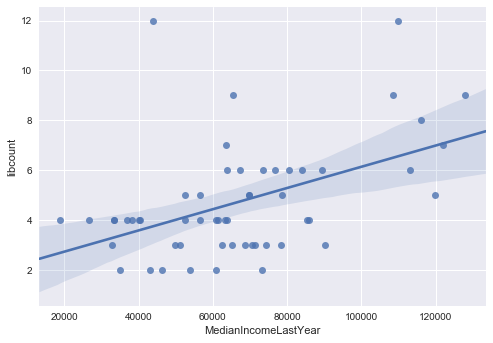

In [264]:
#https://stackoverflow.com/questions/42261976/how-to-plot-statsmodels-linear-regression-ols-cleanly?answertab=active#tab-top
import seaborn as sns

sns.regplot(y ='libcount', x = "MedianIncomeLastYear", data = LibIP)

In [265]:
LibIP['hundredsofpeople']= (LibIP['Population']/100)


In [266]:
LibIP['libOpop'] =  LibIP['libcount']/LibIP['Population']

In [267]:
LibIP['libper100'] =  LibIP['libcount']/LibIP['hundredsofpeople']

In [268]:
LibIP.head()

,puma,libcount,MedianIncomeLastYear,Population,geometry,hundredsofpeople,libOpop,libper100
0,3701,6,76850,109810,POLYGON ((-73.89641133483133 40.90450452082026...,1098.10,0.000055,0.005464
1,3702,5,56434,144341,POLYGON ((-73.86477258283533 40.90201244187379...,1443.41,0.000035,0.003464
2,3703,4,60903,122417,(POLYGON ((-73.78833349834532 40.8346671297593...,1224.17,0.000033,0.003268
3,3704,4,52431,129501,"POLYGON ((-73.84792614069238 40.8713422330779,...",1295.01,0.000031,0.003089
4,3705,4,26641,171849,POLYGON ((-73.88753429505171 40.82250933946978...,1718.49,0.000023,0.002328


In [382]:
#https://github.com/fedhere/PUI2017_fb55/blob/master/HW6_fb55/building_nrg_solution.ipynb

def fit_line1(x, y):
    """Fits a line to data properly adding the dimensions required by statsmodels
    Arguments:
        x: series of exogenous variables
        y: seried of endogenous variables
    Output:
        slope, intercept of best fit line, and the full model fit
    """
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse


In [383]:
X1 = LibIP["MedianIncomeLastYear"]
y1 = log(LibIP["libOpop"])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                libOpop   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     17.39
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           0.000113
Time:                        16:14:38   Log-Likelihood:                -22.592
No. Observations:                  55   AIC:                             49.18
Df Residuals:                      53   BIC:                             53.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  -11.0242      0.142    -77.608      0.000       -11.309   -10.739
MedianIncomeLastYear  8.288e-06   1.99e-06      4.170      0.000       4.3e-06  1.23e-05
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.245
Skew:                          -0.291   Prob(JB):                        0.536
Kurtosis:                       2.548   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

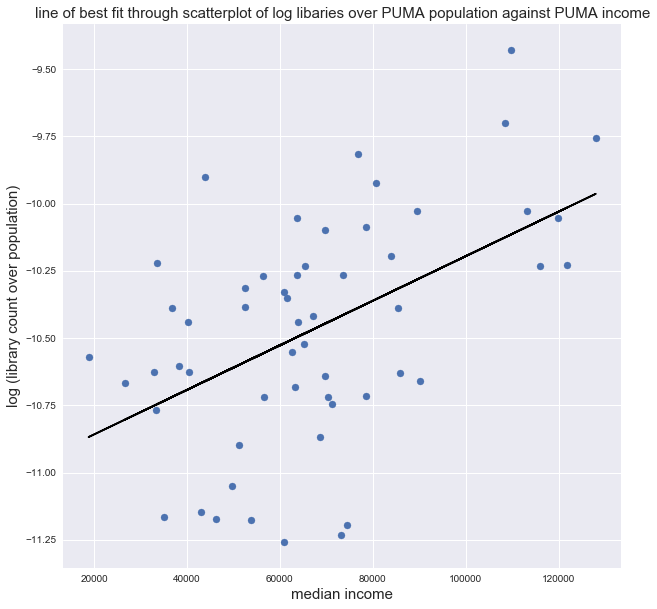

In [384]:
p1, p0, linmodel_0 = fit_line1(X1, 
                        y1)
pl.figure(figsize=(10,10))
pl.scatter(X1, y1)
plot(X1, linmodel_0.predict(), 'k')

xl = pl.ylabel('log (library count over population)', fontsize=15)
yl = pl.xlabel("median income", fontsize=15)
pl.title('line of best fit through scatterplot of log libaries over PUMA population against PUMA income', fontsize = 15)
pl.savefig('libOpop')
linmodel_0.summary()

In [385]:
X2 = LibIP["MedianIncomeLastYear"]
y2 = LibIP["libper100"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              libper100   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     22.11
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           1.88e-05
Time:                        16:14:39   Log-Likelihood:                 295.36
No. Observations:                  55   AIC:                            -586.7
Df Residuals:                      53   BIC:                            -582.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    0.0012      0.000      2.669      0.010         0.000     0.002
MedianIncomeLastYear  2.884e-08   6.13e-09      4.702      0.000      1.65e-08  4.11e-08
==============================================================================
Omnibus:                        7.135   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.183
Skew:                           0.716   Prob(JB):                       0.0454
Kurtosis:                       3.805   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

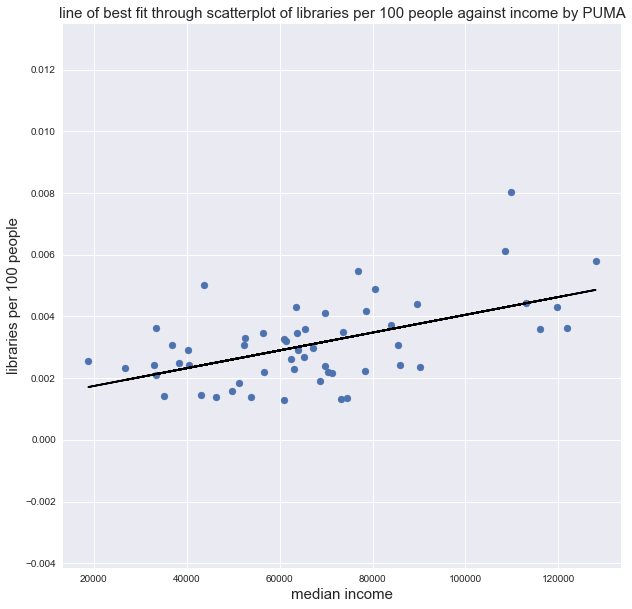

In [386]:
p1, p0, linmodel_1 = fit_line1(X2, 
                        y2)
pl.figure(figsize=(10,10))
pl.scatter(X2, y2)
plot(X2, linmodel_1.predict(), 'k')

xl = pl.ylabel('libraries per 100 people', fontsize=15)
yl = pl.xlabel("median income", fontsize=15)
pl.title('line of best fit through scatterplot of libraries per 100 people against income by PUMA', fontsize = 15)
pl.savefig('libper100')

linmodel_1.summary()

Text(0.5,1,u'Regresion, fitted and real')

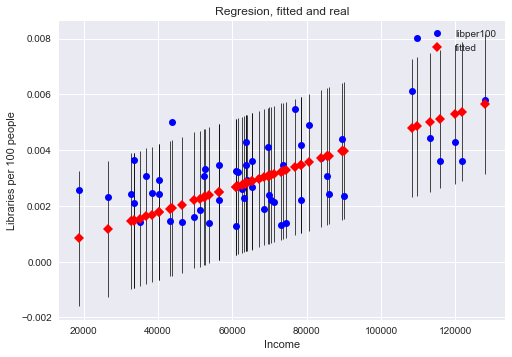

In [387]:
#http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_fit.html
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model2, 0, ax=ax)
ax.set_ylabel("Libraries per 100 people")
ax.set_xlabel("Income")
ax.set_title("Regresion, fitted and real")

In [388]:
y4 = LibIP["libcount"]
X4 = LibIP["Population"]


In [389]:
 LibIP["Population"].max()

250162

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               libcount   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     10.04
Date:                Thu, 14 Dec 2017   Prob (F-statistic):            0.00254
Time:                        16:14:40   Log-Likelihood:                -118.11
No. Observations:                  55   AIC:                             240.2
Df Residuals:                      53   BIC:                             244.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4312      1.385      0.311      0.757        -2.347     3.210
Population  2.792e-05   8.81e-06      3.169      0.003      1.03e-05  4.56e-05
==============================================================================
Omnibus:                       15.879   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.339
Skew:                           1.125   Prob(JB):                     6.32e-05
Kurtosis:                       4.838   Cond. No.                     7.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

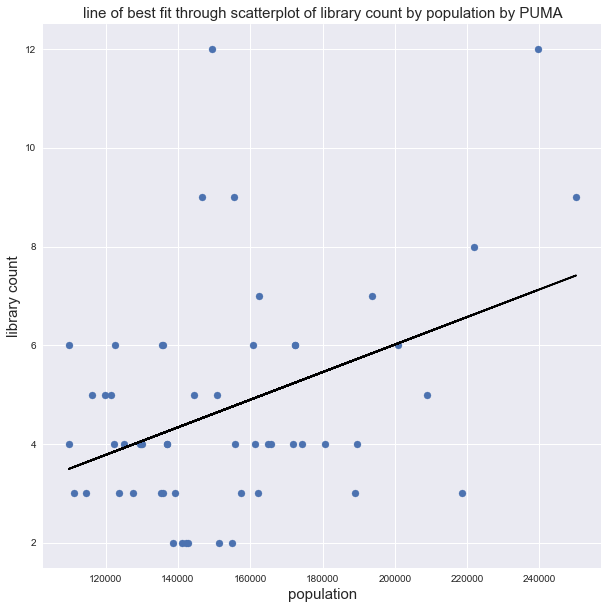

In [390]:
p1, p0, linmodel_3 = fit_line1(X4, 
                        y4)
pl.figure(figsize=(10,10))
pl.scatter(X4, y4)
plot(X4, linmodel_3.predict(), 'k')

x4 = pl.ylabel('library count', fontsize=15)
y4 = pl.xlabel("population", fontsize=15)
pl.title('line of best fit through scatterplot of library count by population by PUMA', fontsize = 15)
pl.savefig('libandPOP')

linmodel_3.summary()

In [391]:
y5 = LibIP["libcount"]
X5 = LibIP["MedianIncomeLastYear"]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               libcount   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     15.42
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           0.000251
Time:                        16:15:06   Log-Likelihood:                -115.86
No. Observations:                  55   AIC:                             235.7
Df Residuals:                      53   BIC:                             239.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    1.8824      0.774      2.431      0.018         0.329     3.436
MedianIncomeLastYear  4.255e-05   1.08e-05      3.926      0.000      2.08e-05  6.43e-05
==============================================================================
Omnibus:                       29.897   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.998
Skew:                           1.621   Prob(JB):                     2.83e-15
Kurtosis:                       7.327   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

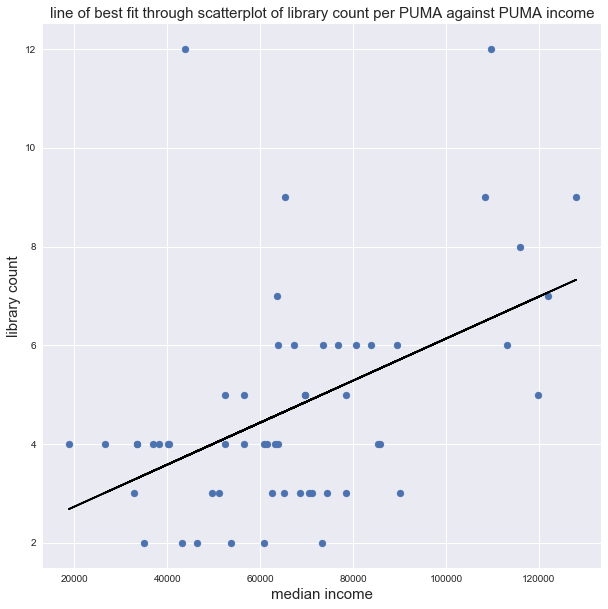

In [395]:
p1, p0, linmodel_0 = fit_line1(X5, 
                        y5)
pl.figure(figsize=(10,10))
pl.scatter(X5, y5)
plot(X5, linmodel_0.predict(), 'k')

xl = pl.ylabel('library count', fontsize=15)
yl = pl.xlabel("median income", fontsize=15)
pl.title('line of best fit through scatterplot of library count per PUMA against PUMA income', fontsize = 15)
pl.savefig('libI')
linmodel_0.summary()

'''found to be wrong: The amount of libaries is highly correlated with income, income normalized by population, and population itself. R^2 is above .8 in each case'''

The amount of libaries is barely correlated with income, income normalized by population, and population itself. R^2 is under .3 in each case

In [393]:
#geospatial attempt

In [394]:
facl.head()

,cartodb_id,zipcode,bbl,facname,factype,geometry
index_left,,,,,,
0,16790.0,10007.0,1001600021,Historical Records NY Cnty Clerk,Special Libraries,POINT (-74.00155700000001 40.71429)
1,1437.0,10036.0,1012590048,The General Society Library,Special Libraries,POINT (-73.981346 40.75512)
2,29303.0,10029.0,1016080069,New York Academy Of Medicine,Special Libraries,POINT (-73.952218 40.791984)
3,32364.0,10016.0,1008660058,The Morgan Library & Museum,Special Libraries,POINT (-73.981328 40.74929)
4,13295.0,10010.0,1008230059,Van Alen Institute,Special Libraries,POINT (-73.991829 40.741386)


In [278]:
facl.to_file('facl.shp', driver='ESRI Shapefile', encoding="utf8")

In [279]:
LibIP = gpd.GeoDataFrame(LibIP)

In [280]:
#https://github.com/GeospatialPython/pyshp

In [281]:
LibIP.to_file('LibIP.shp', encoding="utf8", driver='ESRI Shapefile')

In [282]:
thresh = pysal.min_threshold_dist_from_shapefile("facl.shp")
thresh

0.056474593261045411

In [283]:
wt = pysal.weights.DistanceBand.from_shapefile("facl.shp", threshold=thresh, binary=True)
wt.min_neighbors

1

In [284]:
f2 =  gpd.GeoDataFrame.from_file('facl.shp')

In [285]:
f2

,cartodb_id,zipcode,bbl,facname,factype,geometry
0,16790.0,10007.0,1001600021,Historical Records NY Cnty Clerk,Special Libraries,POINT (-74.00155700000001 40.71429)
1,1437.0,10036.0,1012590048,The General Society Library,Special Libraries,POINT (-73.981346 40.75512)
2,29303.0,10029.0,1016080069,New York Academy Of Medicine,Special Libraries,POINT (-73.952218 40.791984)
3,32364.0,10016.0,1008660058,The Morgan Library & Museum,Special Libraries,POINT (-73.981328 40.74929)
4,13295.0,10010.0,1008230059,Van Alen Institute,Special Libraries,POINT (-73.991829 40.741386)
5,25579.0,10022.0,1013750031,The Grolier Club Of New York,Special Libraries,POINT (-73.96985599999999 40.763994)
6,31896.0,10019.0,1010487501,Media Alliance Inc,Special Libraries,POINT (-73.984573 40.767975)
7,4993.0,10029.0,1016100001,Puerto Rican Cultural Her. Library,Special Libraries,POINT (-73.95136599999999 40.793094)
8,16631.0,10065.0,1013950064,Old York Library,Special Libraries,POINT (-73.96816699999999 40.763623)
9,13135.0,10023.0,1011340001,New York Philharmonic,Special Libraries,POINT (-73.983018 40.772818)


In [286]:
LibIP.head()

,puma,libcount,MedianIncomeLastYear,Population,geometry,hundredsofpeople,libOpop,libper100
0,3701,6,76850,109810,POLYGON ((-73.89641133483133 40.90450452082026...,1098.10,0.000055,0.005464
1,3702,5,56434,144341,POLYGON ((-73.86477258283533 40.90201244187379...,1443.41,0.000035,0.003464
2,3703,4,60903,122417,(POLYGON ((-73.78833349834532 40.8346671297593...,1224.17,0.000033,0.003268
3,3704,4,52431,129501,"POLYGON ((-73.84792614069238 40.8713422330779,...",1295.01,0.000031,0.003089
4,3705,4,26641,171849,POLYGON ((-73.88753429505171 40.82250933946978...,1718.49,0.000023,0.002328


In [287]:
alpha = 0.05

In [288]:
w = pysal.queen_from_shapefile('LibIP.shp',idVariable='MedianInco')
w.n


55

In [289]:
y = np.array(LibIP['libcount'])

In [290]:
#rook location and Libcount

In [291]:
w = pysal.weights.Rook.from_shapefile("LibIP.shp")

In [292]:
mi = pysal.Moran(y,  w, two_tailed=False)

In [293]:
'''p value'''

mi.p_norm

2.843503314298168e-05

In [294]:
'''z value'''

mi.z_norm 

4.0254350908773722

In [295]:
mi?

In [296]:
'''morans I value'''

mi.I

0.35867853290183399

p<0.05 so there is spacial autocorrelation

In [297]:
#queen location and Libcount

In [298]:
w1 = pysal.weights.Queen.from_shapefile("LibIP.shp")

In [299]:
mi1 = pysal.Moran(y,  w1, two_tailed=False)

In [300]:
'''p value'''
mi1.p_norm

2.0157053260305702e-05

In [301]:
'''z value'''
mi1.z_norm 

4.1056720664228719

In [302]:
'''morans I value'''
mi1.I

0.36370010787486534